# Agent interaction analysis
## Step by step data extraction

In [207]:
# Imports
import pandas as pd
# from egg.core.interaction import Interaction
import torch
from sklearn.decomposition import PCA
from pathlib import Path
from matplotlib import pyplot as plt
from egg.zoo.pop.scripts.analysis_tools.analysis import interaction_to_dataframe, name_to_idx, extract_name
import seaborn as sns
# used in a later part of the script :
import numpy as np
import scipy

In [181]:
# Path to your interaction files
base_path = Path("/Users/u203445/Documents/projects/EGG/interactions/")

models = ['vgg11','vit','resnet152', 'inception','swin','dino']
interaction_files = [f"None['{model1}']['{model2}']" for model1 in models for model2 in models]
interaction_files.append("fullerpop")
interaction_files.append("fullpop")

print(interaction_files)

inters = [torch.load(base_path / file) for file in interaction_files]
df_inters = [interaction_to_dataframe(inter) for inter in inters] # <-- put interactions into dataframes which are easy to handle 
# print("available information in dataframe : \n", df_inters[0].columns)



["None['vgg11']['vgg11']", "None['vgg11']['vit']", "None['vgg11']['resnet152']", "None['vgg11']['inception']", "None['vgg11']['swin']", "None['vgg11']['dino']", "None['vit']['vgg11']", "None['vit']['vit']", "None['vit']['resnet152']", "None['vit']['inception']", "None['vit']['swin']", "None['vit']['dino']", "None['resnet152']['vgg11']", "None['resnet152']['vit']", "None['resnet152']['resnet152']", "None['resnet152']['inception']", "None['resnet152']['swin']", "None['resnet152']['dino']", "None['inception']['vgg11']", "None['inception']['vit']", "None['inception']['resnet152']", "None['inception']['inception']", "None['inception']['swin']", "None['inception']['dino']", "None['swin']['vgg11']", "None['swin']['vit']", "None['swin']['resnet152']", "None['swin']['inception']", "None['swin']['swin']", "None['swin']['dino']", "None['dino']['vgg11']", "None['dino']['vit']", "None['dino']['resnet152']", "None['dino']['inception']", "None['dino']['swin']", "None['dino']['dino']", 'fullerpop', 'f

In [4]:
# if we want to work from a csv file instead
# for i,df_inter in enumerate(df_inters):
#     print(df_inter.to_csv(base_path / (interaction_files[i] + ".csv")))

### A few numbers to explain the data

In [182]:
indexed_printing = True # UI : if set to false, file names are used instead of indices

# check performance scores :
for i, df_inter in enumerate(df_inters):
    acc = (df_inter.batch_number % 64 == df_inter.receiver_output).mean().item()
    if df_inter.sender_idx.nunique() != 1 and df_inter.recv_idx.nunique() != 1:
        print(f"---------- {interaction_files[i]} ----------")
        print(f"average accuracy = {acc}")
        print(f"{df_inter.sender_idx.nunique()} sender, {df_inter.recv_idx.nunique()} receivers")
        for sidx in range(df_inter.sender_idx.nunique()):
            for ridx in range(df_inter.recv_idx.nunique()):
                select_inters = df_inter[df_inter.sender_idx == sidx][df_inter.recv_idx == ridx]
                _acc = (select_inters.batch_number % 64 == select_inters.receiver_output).mean().item()
                print(f"{sidx} - {ridx} accuracy = {_acc}")
    else :
        _indexes = [name_to_idx(name) for name in extract_name(interaction_files[i])]
        print(f"{_indexes[0]} - {_indexes[1]} accuracy = {acc}" if indexed_printing else f"{interaction_files[i]}  accuracy = {acc}")

    # print(df_inter.sample())

0 - 0 accuracy = 0.9998444167852063
0 - 1 accuracy = 0.9810855263157895
0 - 2 accuracy = 0.9973995376955903
0 - 3 accuracy = 0.9898426386913229
0 - 4 accuracy = 0.9683499288762447
0 - 5 accuracy = 0.9974884423897582
1 - 0 accuracy = 0.9857085704125178
1 - 1 accuracy = 0.9999110953058321
1 - 2 accuracy = 0.9919763513513513
1 - 3 accuracy = 0.9710170697012802
1 - 4 accuracy = 0.9935321834992887
1 - 5 accuracy = 0.9929543029871978
2 - 0 accuracy = 0.9992887624466572
2 - 1 accuracy = 0.9916651849217639
2 - 2 accuracy = 0.9999333214793741
2 - 3 accuracy = 0.9983552631578947
2 - 4 accuracy = 0.9893314366998578
2 - 5 accuracy = 0.9990665007112376
3 - 0 accuracy = 0.9938878022759602
3 - 1 accuracy = 0.9534139402560455
3 - 2 accuracy = 0.9947990753911806
3 - 3 accuracy = 0.9992887624466572
3 - 4 accuracy = 0.9534806187766715
3 - 5 accuracy = 0.9926875889046942
4 - 0 accuracy = 0.9622599573257468
4 - 1 accuracy = 0.9889535917496444
4 - 2 accuracy = 0.9782405761024182
4 - 3 accuracy = 0.958281472

C:\Users\u203445\AppData\Local\Temp\ipykernel_2928\1315138384.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  select_inters = df_inter[df_inter.sender_idx == sidx][df_inter.recv_idx == ridx]


0 - 0 accuracy = 0.9904205192034139
0 - 1 accuracy = 0.762602240398293
0 - 2 accuracy = 0.9130512091038406
0 - 3 accuracy = 0.8490620554765291
0 - 4 accuracy = 0.7199946657183499
0 - 5 accuracy = 0.9131623399715505
1 - 0 accuracy = 0.7846283783783784
1 - 1 accuracy = 0.9895536984352774
1 - 2 accuracy = 0.8744443456614509
1 - 3 accuracy = 0.7768047652916074
1 - 4 accuracy = 0.923719772403983
1 - 5 accuracy = 0.8589971550497866
2 - 0 accuracy = 0.9726395803698435
2 - 1 accuracy = 0.8859352773826458
2 - 2 accuracy = 0.9980885490753911
2 - 3 accuracy = 0.9593927809388336
2 - 4 accuracy = 0.8511735419630156
2 - 5 accuracy = 0.9713726884779517
3 - 0 accuracy = 0.8639758179231863
3 - 1 accuracy = 0.7165718349928877
3 - 2 accuracy = 0.9006490042674253
3 - 3 accuracy = 0.9773737553342816
3 - 4 accuracy = 0.6896337126600285
3 - 5 accuracy = 0.8763557965860598
4 - 0 accuracy = 0.7494221194879089
4 - 1 accuracy = 0.925520092460882
4 - 2 accuracy = 0.8417274182076814
4 - 3 accuracy = 0.747377311522

In [6]:
# Is there a significant difference between one on one and population communication ?
# Is there a difference between homogeneous and heterogeneous populations ?

# get 1 - 1 accuracies
a = []
rs_pairs = []
pop_inters = pd.DataFrame()
for i, df_inter in enumerate(df_inters):
    if df_inter.sender_idx.nunique() == 1 and df_inter.recv_idx.nunique() == 1:
        # get index
        sidx = name_to_idx(extract_name(interaction_files[i])[0])
        ridx = name_to_idx(extract_name(interaction_files[i])[1])
        rs_pairs.append((sidx, ridx))
        
        _a_acc = (df_inter.batch_number % 64 == df_inter.receiver_output).mean().item()
        a.append(_a_acc)
    else :
        # use this pass to get the population interaction file from the bunch
        pop_inters = df_inter

b=[]
# get pop accuracy
for sidx, ridx in rs_pairs:
    selected_inters = pop_inters[pop_inters.sender_idx == sidx][pop_inters.recv_idx == ridx]
    _b_acc = (selected_inters.batch_number % 64 == selected_inters.receiver_output).mean()
    b.append(_b_acc)


a = [_val for i,_val in enumerate(a) if not pd.isnull(b)[i]]
b = [_val for _val in b if not pd.isnull(_val)]
print(a,b)
print("PASSED 3")

# paired wilcoxon : no proof of normal distribution
print("Wilcoxon :", scipy.stats.wilcoxon(a,b)) # a is less than b
print("Wilcoxon (a<b):", scipy.stats.wilcoxon(a,b, alternative="less")) # a is less than b

# paired fischer : normal distribution
print("Fischer :", scipy.stats.ttest_rel(a,b))
print("Fischer (a<b):", scipy.stats.ttest_rel(a,b, alternative="less"))

C:\Users\u203445\AppData\Local\Temp\ipykernel_16448\1038352076.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_inters = pop_inters[pop_inters.sender_idx == sidx][pop_inters.recv_idx == ridx]


[0.9998444167852063, 0.9810855263157895, 0.9973995376955903, 0.9898426386913229, 0.9857085704125178, 0.9999110953058321, 0.9919763513513513, 0.9710170697012802, 0.9992887624466572, 0.9916651849217639, 0.9999333214793741, 0.9983552631578947, 0.9938878022759602, 0.9534139402560455, 0.9947990753911806, 0.9992887624466572] [1.0, 0.9621394230769231, 0.9921875, 0.9603365384615384, 0.9385016025641025, 1.0, 0.9767628205128205, 0.9160657051282052, 0.9923878205128205, 0.9867788461538461, 1.0, 0.9877804487179487, 0.9613381410256411, 0.9381009615384616, 0.9845753205128205, 1.0]
PASSED 3
Wilcoxon : WilcoxonResult(statistic=10.0, pvalue=0.001312255859375)
Wilcoxon (a<b): WilcoxonResult(statistic=126.0, pvalue=0.9994964599609375)
Fischer : Ttest_relResult(statistic=3.6567971374798014, pvalue=0.002337060326564083)
Fischer (a<b): Ttest_relResult(statistic=3.6567971374798014, pvalue=0.998831469836718)


In [224]:
# given the same image, how different are the messages given by different senders
def euler_distance(a,b):
    # euler distance
    s = (a.loc[:,a.columns.str.contains('dim')].reset_index() - b.loc[:,b.columns.str.contains('dim')].reset_index())**2
    return s.sum(axis=1)**0.5

def cosine_distance(a,b):
    # cosine distance
    a = a.set_index("batch_number")
    b = b.set_index("batch_number")
    cos_dis = []
    a_dim = a.loc[:,a.columns.str.contains('dim')]
    # print(a_dim)
    a_dim = a_dim.values[:,1:]
    b_dim = b.loc[:,b.columns.str.contains('dim')].values[:,1:]
    # print(a_dim.shape, b_dim.shape)
    # print([key for key in a_dim.columns if key in b_dim.columns])
    # print("test", a_dim.sample(3).values)
    cos_dis = 1 - torch.nn.functional.cosine_similarity(torch.Tensor(a_dim), torch.Tensor(b_dim))
    return cos_dis

arch_names = ['vgg11','vit','resnet152', 'inception','swin','dino']

# display distances
for i,df_inter in enumerate([df_inters[-2]]):
    heatmap = np.zeros((df_inter.sender_idx.nunique(), df_inter.recv_idx.nunique()))
    df_distances = pd.DataFrame(columns=["distance","idx1","idx2"])

    for idx1 in range(df_inter.sender_idx.nunique()):
        for idx2 in range(df_inter.recv_idx.nunique()):
            a = df_inter[df_inter.sender_idx == idx1]
            b = df_inter[df_inter.sender_idx == idx2]
            if idx1 != idx2 and not (len(a) == 0 or  len(b) == 0):
                # print(idx1,idx2)
                _dist=cosine_distance(a,b)
                _new_df_dist = pd.DataFrame({"distance":_dist, "idx1":arch_names[idx1], "idx2":arch_names[idx2]})
                df_distances = pd.concat([df_distances,_new_df_dist])
                heatmap[idx1,idx2] = _dist.mean()


sns.boxplot(y=df_distances.distance,x=df_distances.idx1, hue=df_distances.idx2)
# plt.ylim(0, 2e-7) # TODO : deal with the scales
plt.show()

df_heatmap = pd.DataFrame(heatmap, columns=arch_names, index=arch_names)
# plot it with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
    df_heatmap,
    cmap='OrRd',
    linewidth=1
)

5 5


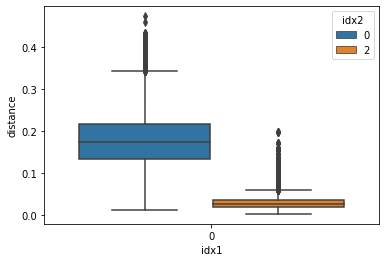

In [184]:
# baseline with shuffling so that that we're not comparing the same images necesseraly
df_distances = pd.DataFrame(columns=["distance","idx1","idx2"])

a = df_inters[-2][df_inters[-2].sender_idx == 0].sample(frac=1)
b = df_inters[-2][df_inters[-2].sender_idx == 1].sample(frac=1)
if not (len(a) == 0 or  len(b) == 0):
    print(idx1,idx2)
    _dist=cosine_distance(a,b)
    _new_df_dist = pd.DataFrame({"distance":_dist, "idx1":0, "idx2":0})
    df_distances = pd.concat([df_distances,_new_df_dist])

a = df_inters[-2][df_inters[-2].sender_idx == 0]
b = df_inters[-2][df_inters[-2].sender_idx == 2]
if not (len(a) == 0 or  len(b) == 0):
    _dist=cosine_distance(a,b)
    _new_df_dist = pd.DataFrame({"distance":_dist, "idx1":0, "idx2":2})
    df_distances = pd.concat([df_distances,_new_df_dist])
if(len(df_distances.distance)!=0):
    sns.boxplot(y=df_distances.distance,x=df_distances.idx1, hue=df_distances.idx2)
    # plt.ylim(0, 2e-7) # TODO : deal with the scales
    plt.show()

## Diagnostic classifier

In [ ]:
import egg.zoo.pop.scripts.analysis_tools.diagnostic_classifier as dc

In [ ]:
for i, df_inter in enumerate(df_inters):
    if df_inter.sender_idx.nunique() != 1 and df_inter.recv_idx.nunique() != 1:
        print(f"---------- {interaction_files[i]} ----------")
        print(f"{df_inter.sender_idx.nunique()} sender, {df_inter.recv_idx.nunique()} receivers")
        for sidx in range(df_inter.sender_idx.nunique()):
            for ridx in range(df_inter.recv_idx.nunique()):
                select_inters = df_inter[df_inter.sender_idx == sidx][df_inter.recv_idx == ridx]
                select_inters.message =  torch.tensor([select_inters[f"dim_{i}"].values for i in range(16)]).T
                print(sidx, ridx, dc.run_dc(select_inters, n_samples=44992,n_epochs=50).item())

    else :
        df_inter.message = torch.tensor([df_inter[f"dim_{i}"].values for i in range(16)]).T
        print(interaction_files[i][4:] if interaction_files[i][:4] == "None" else interaction_files[i],"\t\t", dc.run_dc(df_inter, n_samples=44992,n_epochs=50).item())


C:\Users\u203445\AppData\Local\Temp\ipykernel_16764\3025593126.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:210.)
  df_inter.message = torch.tensor([df_inter[f"dim_{i}"].values for i in range(16)]).T
C:\Users\u203445\AppData\Local\Temp\ipykernel_16764\3025593126.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_inter.message = torch.tensor([df_inter[f"dim_{i}"].values for i in range(16)]).T
c:\Users\u203445\Miniconda3\envs\quiche\lib\site-packages\egg\zoo\pop\scripts\analysis_tools\diagnostic_classifier.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a

KeyboardInterrupt: 

## CLustering

In [185]:
# clustering
from sklearn.cluster import OPTICS, cluster_optics_dbscan, KMeans
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [190]:
# n_points_per_cluster = 250
_inters = df_inters[-2]
_inters = _inters[_inters.sender_idx == 0].sample(8000) # for OPTICS remain below 8000 or wait more than 31s in the next cell
X = _inters.loc[:,_inters.columns.str.contains('dim')].values
print(X.shape)

(8000, 16)


In [191]:
clust = OPTICS(min_samples=15, xi=0.005, min_cluster_size=40, metric="cosine")
# Run the fit
clust.fit(X)

labels_025 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.025,
)

labels_05 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.05,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]


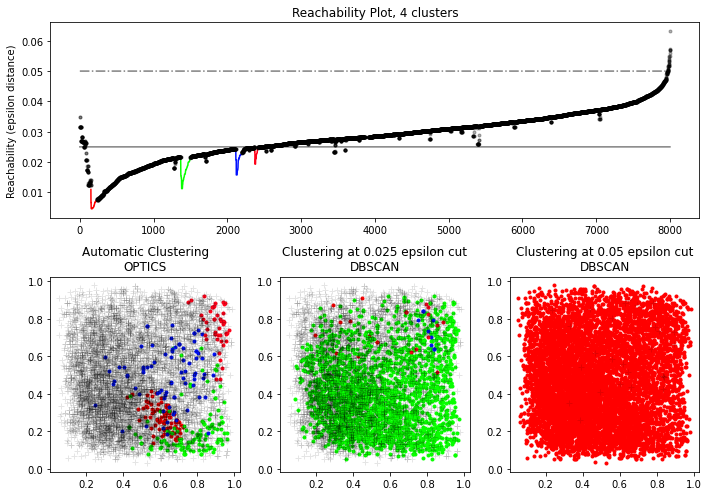

In [192]:
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = plt.cm.get_cmap("hsv", max(labels))
for klass in range(max(labels)):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color=colors(klass))
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 0.025, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.05, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title(f"Reachability Plot, {max(labels)} clusters")

# OPTICS
for klass in range(max(labels)):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], ".", color= colors(klass))
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.025
for klass in range(max(labels)):
    Xk = X[labels_025 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], ".", color= colors(klass))
ax3.plot(X[labels_025 == -1, 0], X[labels_025 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.025 epsilon cut\nDBSCAN")

# DBSCAN at 0.05.
for klass in range(max(labels)):
    Xk = X[labels_05 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], ".", color= colors(klass))
ax4.plot(X[labels_05 == -1, 0], X[labels_05 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 0.05 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

In [193]:
clust2 = KMeans(1000)
clust.fit(X)
labels = clust.labels_[clust.ordering_]


n_classes =  4


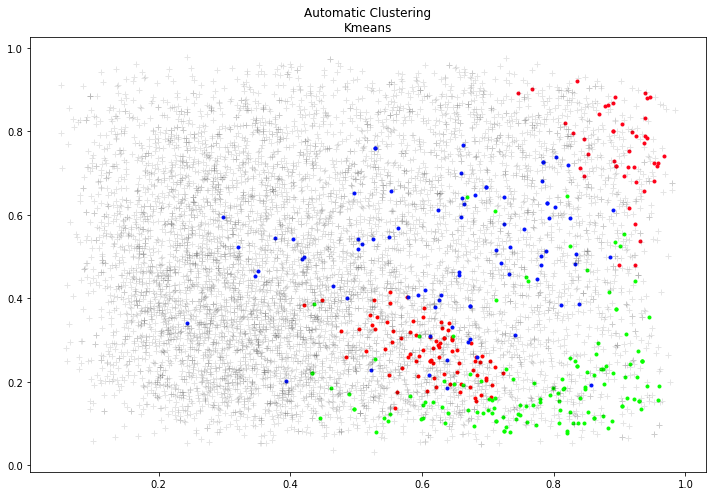

In [194]:
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(1, 1)
ax = plt.subplot(G[0, :])
# ax.plot(space, np.full_like(space, 1.0, dtype=float), "k.", alpha=0.3)
print("n_classes = ",max(labels))
colors = plt.cm.get_cmap("hsv", max(labels))
for klass in range(max(labels)):
    Xk = X[clust.labels_ == klass]
    ax.plot(Xk[:, 0], Xk[:, 1], ".", color=colors(klass))
ax.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax.set_title("Automatic Clustering\nKmeans")
plt.tight_layout()
plt.show()

## perturbations along dimensions

In [195]:
from egg.zoo.pop.data import get_dataloader
# import torchvision
import numpy as np
import random

In [196]:
# get the dataloader
# redoing experiments with new seeding. Until then, useless.
def get_dl():
    dl, _ = get_dataloader(
        "C:\\Users\\u203445\\Documents\\projects\\EGG\\egg\\zoo\\pop\\data",
        "cifar100",
        batch_size=64,
        image_size=284,
        num_workers=0,
        use_augmentations=False,
    )
    return dl

# seed must correspond to one used at training time : usually 111
def seed_all(seed):
    if not seed:
        seed = 111

    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [197]:
# toolkit

# look for the most similar message in the interaction file (k-nearest)
def find_similar(message, interactions):
    _dist = 1 - torch.nn.functional.cosine_similarity(torch.Tensor(message), torch.Tensor(interactions.loc[:,interactions.columns.str.contains('dim')].values))
    return _dist.argmin().item()

# look for the n_values most similar messages in the interaction file (k-nearest)
def find_n_similar(message, interactions, n_values=1):
    _dist = 1 - torch.nn.functional.cosine_similarity(torch.Tensor(message), torch.Tensor(interactions.loc[:,interactions.columns.str.contains('dim')].values))
    return torch.topk(_dist, n_values)

# look at the image that was chosen in that case
def look_at_image(msg_indexes, interactions, train_dataset):
    # get the image chosen by the receiver on the given message
    selected_interactions = interactions.loc[msg_indexes, :].drop_duplicates()
    selected_interactions = selected_interactions.sort_values('batch_number', ascending=True)
    msg_rcv_output = selected_interactions['receiver_output'].values
    msg_batch = selected_interactions['batch_number'].values
    print(msg_rcv_output, msg_batch)
    images = []

    # message indexes have been ordered. We are forced to enumerate thorugh the dataloader, but manage to do it only once
    _i = 0
    for batch_id, batch in enumerate(train_dataset): # This is the slow part, might work better with Dataset object
        if batch_id == msg_batch[_i] // 64:
            # when multiple images are taken from the same batch, then they are all processed before moving to the next one
            _j = 0
            while msg_batch[_i] // 64 == msg_batch[_i + _j] // 64:
                images.append(np.transpose(batch[2][msg_rcv_output[_i + _j]], (1, 2, 0)))
                if len(images) >= len(msg_batch):
                    return images
                else:
                    _j += 1
            
            _i += _j

            
    print(f"error, missing {len(msg_batch) - len(images)} images out of {len(msg_batch)}")
    return images

Files already downloaded and verified
[37 20 52 40 48] [ 421  980 1652 2616 3632]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


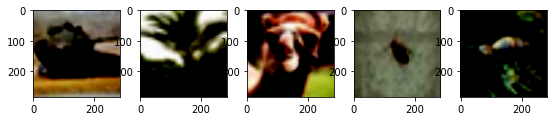

In [ ]:
# we display images that were chosen for a given messages (or its nearest approximation), with increasing perturbations along a chosen axis
# so as to get an idea of the information stored along each axis
message = [0.2] * 16
df_inter = df_inters[-1]

# seed_all(111)
# repeat after adding a distraction on chosen axis
perturbation_axis = 6
n_perturbations = 100
indexes = []
for i in range(n_perturbations):
    message[perturbation_axis] = i / n_perturbations
    indexes.append(find_similar(message, df_inter))

fig = plt.figure(figsize=(15, 15))
dl = get_dl()
for i,im in enumerate(look_at_image(indexes, df_inter, dl)):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(im)

plt.show()
# eyeball the images along the chosen axis, see if something comes out of it


Files already downloaded and verified
[42 24 46 18 52 11 10 27 35 43] [ 682  728  750  786 1332 1611 1802 4059 4707 4981]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

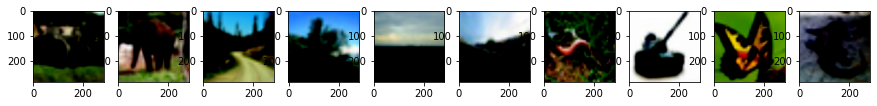

Files already downloaded and verified
[57 31 40 26  6 20 23 34 43 41] [ 569  799 1000 1242 2246 2964 2967 3234 3627 4521]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

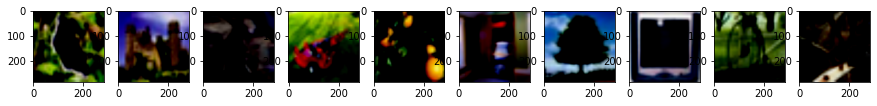

Files already downloaded and verified
[ 1 10 49  4 35 13  8 38 33  3] [ 193  330  817 1412 1443 1549 4168 4198 4577 4739]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

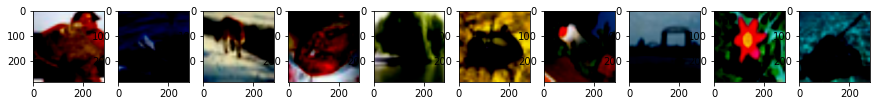

Files already downloaded and verified
[11 41 48 62 58 33 21 59 60 39] [ 715 1065 1456 1790 4090 4129 4437 4539 4668 4903]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

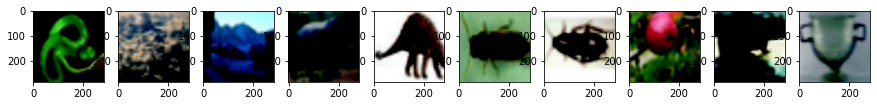

Files already downloaded and verified
[44 34 40 42 10  6  7  3 28 42] [ 620 1186 1320 1834 2890 3142 3463 3843 4572 4778]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

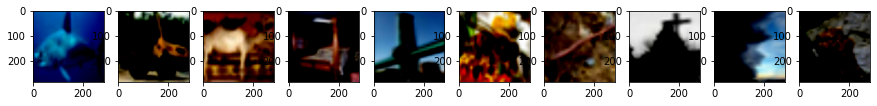

Files already downloaded and verified
[46  6 23  3 53 33 36 44 44 61] [ 366  838  855 1603 1973 3873 4004 4012 4460 4925]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


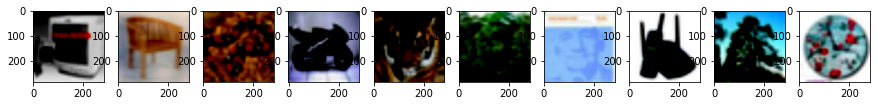

Files already downloaded and verified
[17 59  5 63 62 24 18 57 26 55] [ 145 1915 2309 2431 2750 2968 3026 3513 3802 4343]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

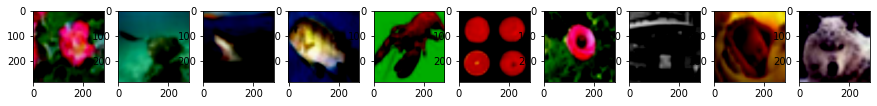

Files already downloaded and verified
[37 41 29 27 43 50  7 33 47  3] [ 933 1065 1373 2587 2603 2930 4231 4321 4719 4803]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

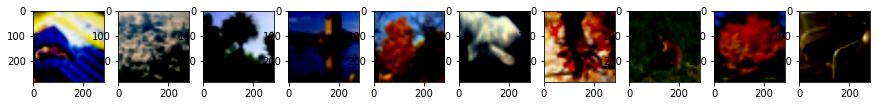

Files already downloaded and verified
[21 44 27 29  4 42 40 55  2 26] [ 277  556  603 1821 1860 2474 2600 3063 3842 4570]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

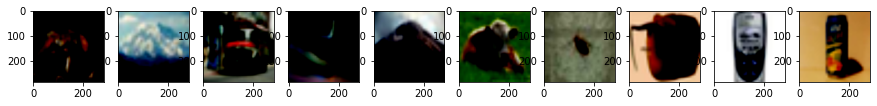

Files already downloaded and verified
[31 60 18 17  6 37 29 13 34 36] [ 223  572 1554 1745 1990 2310 3741 4237 4514 4516]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

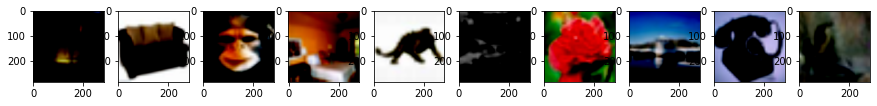

Files already downloaded and verified
[61 21 26 35 30 23 17 63 14 32] [  61 1621 1626 1635 2654 3735 3793 3967 4942 4960]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

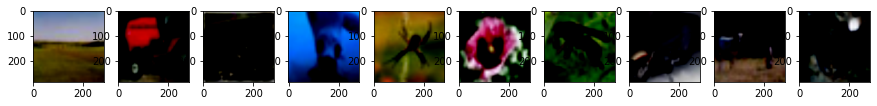

Files already downloaded and verified
[ 4 32 16 33 59 39 60 40 22 15] [ 580 1184 1232 2209 2235 2535 3132 3752 3926 4623]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

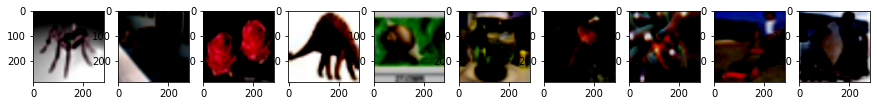

Files already downloaded and verified
[ 1 35 38 25 59 63 45 40  0 49] [1281 1571 1958 2457 3387 3647 3885 4584 4736 4785]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

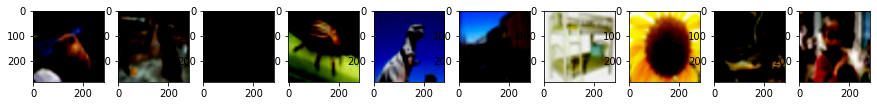

Files already downloaded and verified
[43 38 30 12 48 63 58 55 15  0] [ 427  806 1374 2380 2992 3135 4410 4791 4815 4928]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

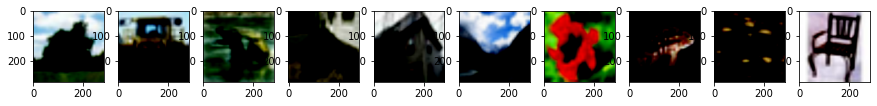

Files already downloaded and verified
[22 60 28 45 25 50  5 22 58 14] [ 854  892  945 1645 1881 2290 3461 3734 3962 3982]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

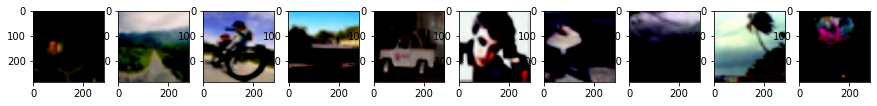

Files already downloaded and verified
[18 46 34 42 53  4 31  6 29 27] [ 978 1326 1826 1834 2229 2372 2399 3142 3293 4123]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

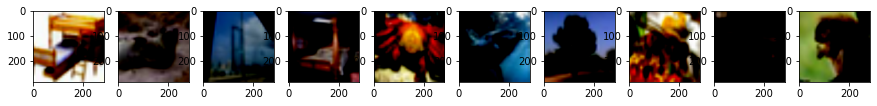

In [200]:
# find n closest images to one_hot message on a given axis
# a bit slow ~50s * 16 dimensions
df_inter = df_inters[-1]

for dim in range(16):
    message = [0] * 16
    message[dim] = 1 # <-- chooses dimension here

    dl = get_dl() # <-- seeding occurs when we fetch dataloader, reproducibility is ensured

    val, ind = find_n_similar(message, df_inter, n_values=10)

    fig = plt.figure(figsize=(15, 15))
    for i, im in enumerate(look_at_image(ind, df_inter, dl)):
        fig.add_subplot(1, 10, i+1)
        plt.imshow(im)
    plt.show()

In [ ]:
# perturbation accross multiple dimensions using PCA

## Begining of a PCA analysis
lets make an n component PCA with the scikit-learn tool, to get a visual idea of clusters and their correspondance to the pretrained 'human' classes

c:\Users\u203445\Miniconda3\envs\quiche\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\u203445\Miniconda3\envs\quiche\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\u203445\Miniconda3\envs\quiche\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

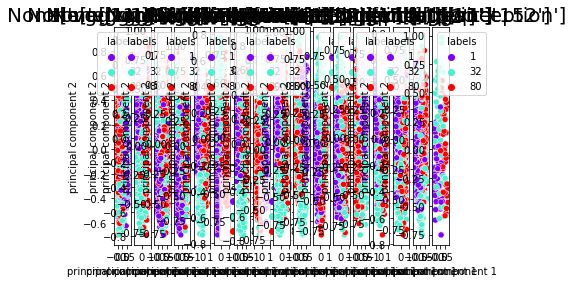

In [ ]:
## Parameter Selection
# select which senders and which pretraining class labels to visualise 
_chosen_sender_index = [0] # _chosen_sender_index = [0,1,2,3]
_chosen_labels = [1, 32, 80] # _chosen_labels = [i for i in range(100)]
# PCA parameters
n_components=10
# PCA dimensions to show on graph
prin_comp_A = 1
prin_comp_B = 2


df_pcas = []
fig, axes = plt.subplots(1,len(df_inters)) 
# lets get those sender specific PCAs
for i,df_inter in enumerate(df_inters):
    # taking only the interactions that have the matching indexes for the chosen sender and the class labels
    selectedsender_interactions = df_inter[df_inter.sender_idx.isin(_chosen_sender_index)][df_inter.labels.isin(_chosen_labels)] 

    # PCA
    pca = PCA(n_components)
    x = selectedsender_interactions.loc[:, selectedsender_interactions.columns.str.contains('dim')]
    principalComponents = pca.fit_transform(x)
    df_pca = pd.DataFrame(data = principalComponents
                , columns = [f'principal component {i+1}' for i in range(n_components)])
    ## If we were to reuse those dimensions, this is what they look like : 
    # print(df_pca[['principal component 1','principal component 2']].sample(3))

    # plotting PCA
    sns.scatterplot(df_pca[f'principal component {prin_comp_A}'],
        df_pca[f'principal component {prin_comp_B}'], 
        hue = selectedsender_interactions.set_index(df_pca.index).labels,
        ax=axes[i],
        palette='rainbow',
    ).set_title(interaction_files[i], fontsize = 20),
    
    # ax.grid()

## Some other basic things
Looking at the message distribution for intuition of where the information is hidden

In [ ]:
melted_dfs = []
for df_inter in df_inters:
    # Setting each dimension column as a categoric variable (called dim) of the same type (message value)
    _melted_df = df_inter.melt(["sender_idx","loss_idx", "recv_idx", "labels", "receiver_output", "batch_number"], var_name="dim", value_name="message_value")
    _melted_df.dim.replace([f"dim_{n}" for n in range(16)],[n for n in range(16)], inplace=True)
    melted_dfs.append(_melted_df)
print(melted_dfs[0].sample(3)) # have a look here if needed 

        sender_idx  loss_idx  recv_idx  labels  receiver_output  batch_number  \
509693           0         0         0      51               61         14781   
583739           0         0         0      37               59         43835   
107059           0         0         0      15               51         17075   

        dim  message_value  
509693   11       0.167332  
583739   12       0.335140  
107059    2       0.096747  


### Message Distribution

C:\Users\u203445\AppData\Local\Temp\ipykernel_4088\3521233354.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  melted_df = melted_df[melted_df.sender_idx.isin(_chosen_sender_index)][melted_df.dim.isin(_chosen_dimensions)] # filtering senders


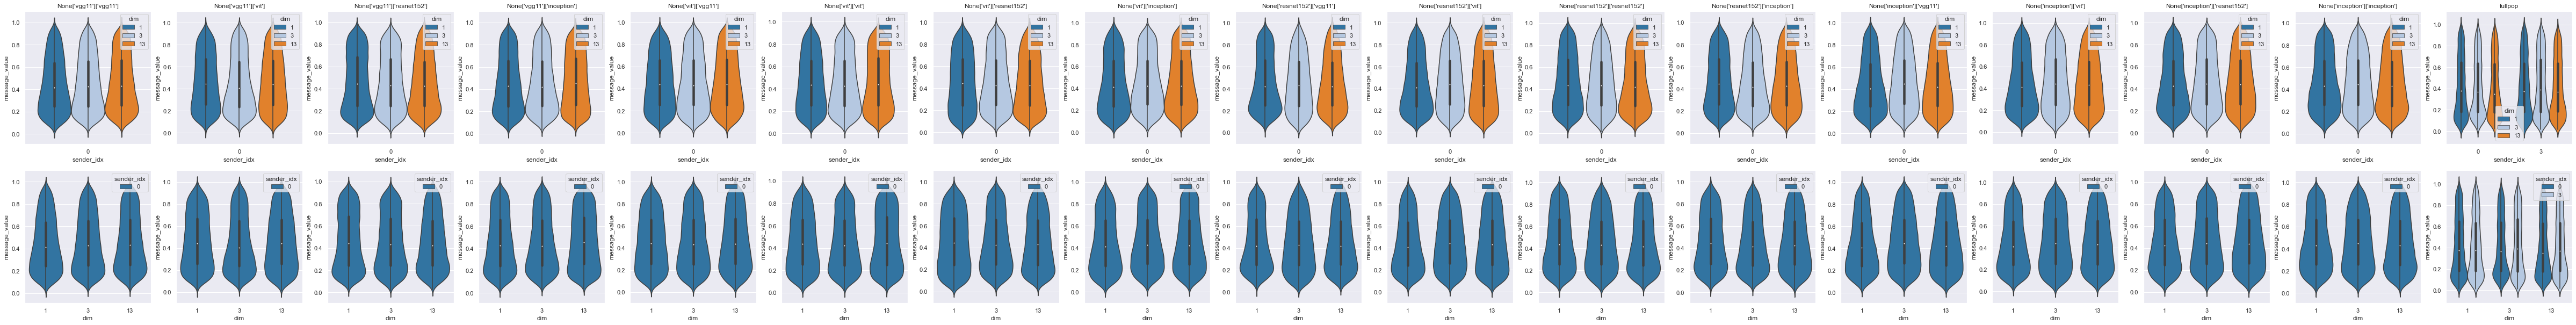

In [ ]:

## Parameter Selection
# select which senders and which dimension to visualise 
_chosen_sender_index = [0,3]   # _chosen_sender_index = [0,1,2,3]
_chosen_dimensions= [1, 3, 13] # _chosen_labels = [i for i in range(16)]

sns.set(rc={'figure.figsize':(5*len(melted_dfs),10)})
fig, axes = plt.subplots(2,len(melted_dfs)) 

# extract and plot
for i,melted_df in enumerate(melted_dfs):
    melted_df = melted_df[melted_df.sender_idx.isin(_chosen_sender_index)][melted_df.dim.isin(_chosen_dimensions)] # filtering senders
    sns.violinplot(x=melted_df.sender_idx, y=melted_df.message_value, hue=melted_df.dim, palette=sns.color_palette("tab20",16),ax=axes[0,i]).set_title(interaction_files[i])
    sns.violinplot(x=melted_df.dim, y=melted_df.message_value, hue=melted_df.sender_idx, palette=sns.color_palette("tab20",16),ax=axes[1,i])
    

# WIP : maybe add some statistical testing
# the way the violins look allow us to know where to set the saturation point were we to discretise

A quick look at the data distribution for messages in each dimension

Now we check if data distribution is modified by the class of the represented image (which it should if it wants to discriminate images)

C:\Users\u203445\AppData\Local\Temp\ipykernel_4088\3036899652.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.sender_idx.isin(_chosen_sender_idxs)]
C:\Users\u203445\AppData\Local\Temp\ipykernel_4088\3036899652.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.dim.isin(_chosen_dimensions)]
C:\Users\u203445\AppData\Local\Temp\ipykernel_4088\3036899652.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.sender_idx.isin(_chosen_sender_idxs)]
C:\Users\u203445\AppData\Local\Temp\ipykernel_4088\3036899652.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.dim.isin(_chosen_dimensions)]
C:\Users\u203445\AppData\Local\Temp\ipykernel_4088\3036899652.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = _df[melted_df.sender_idx.isin(_chosen_sende

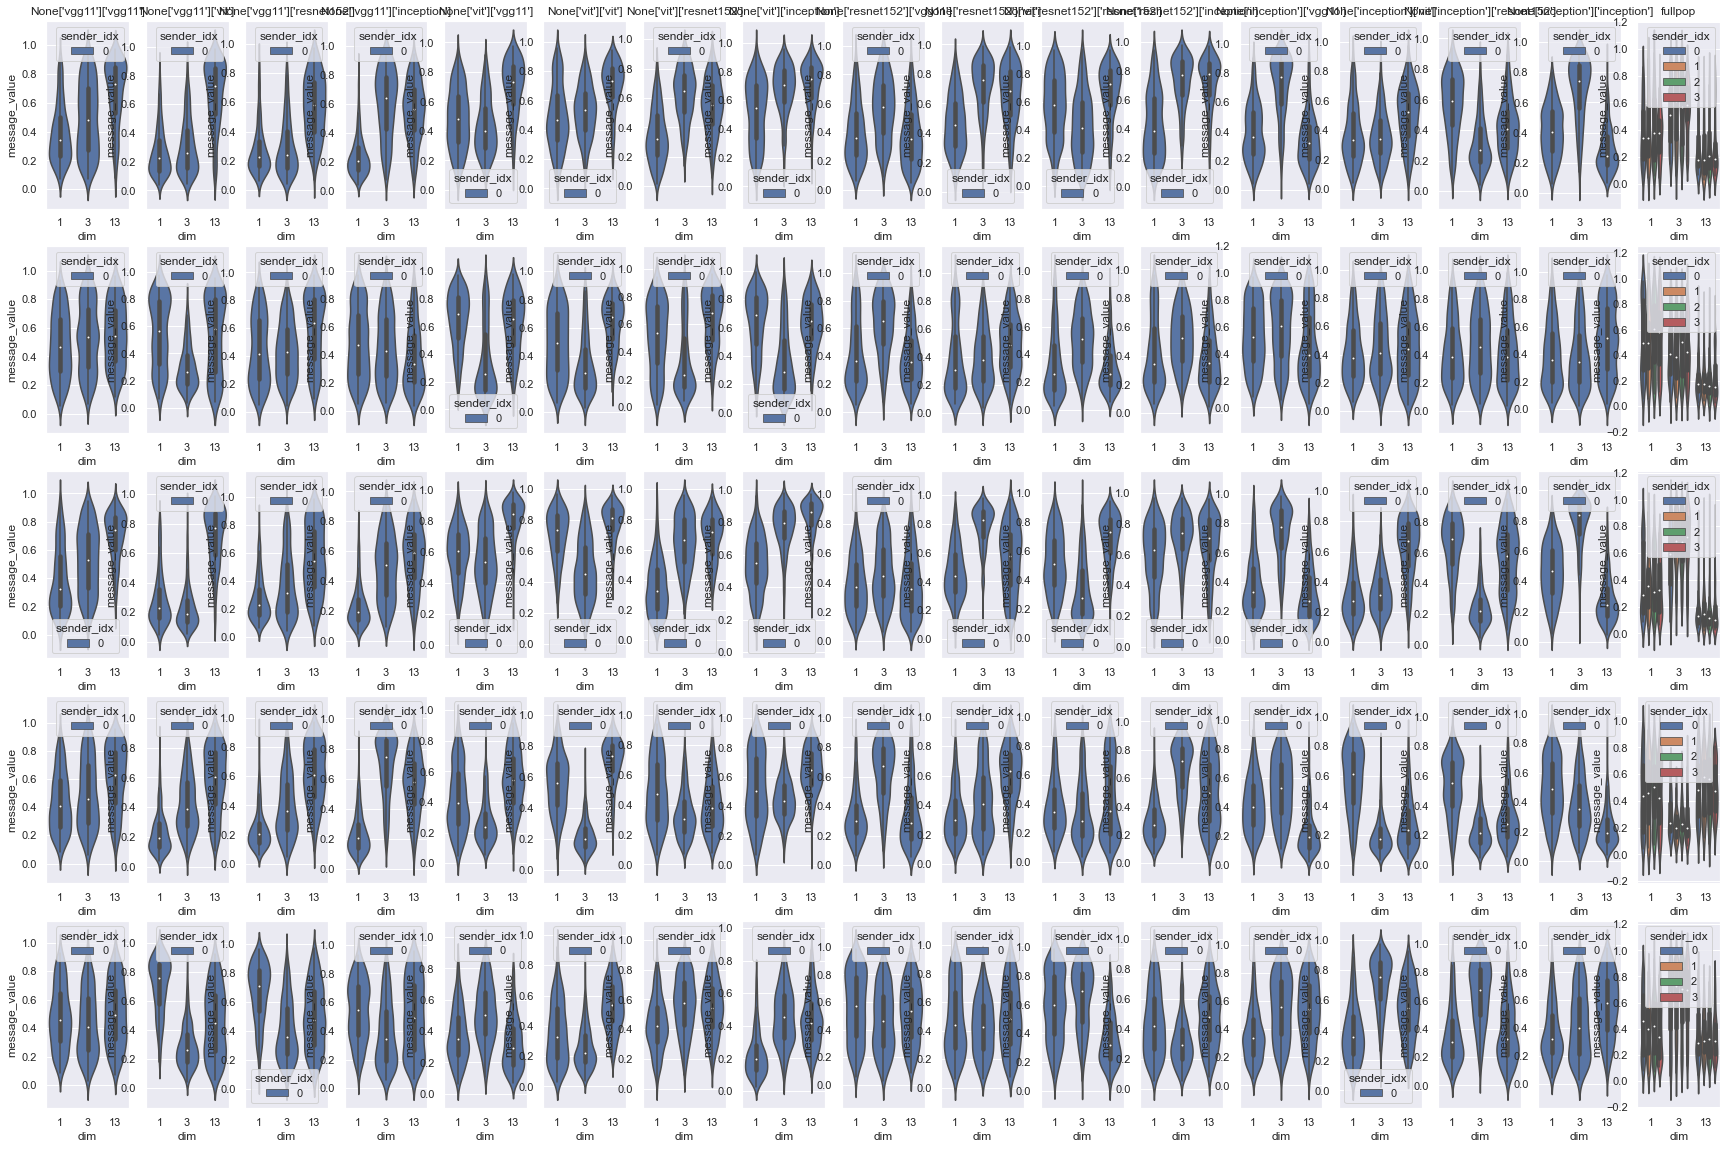

In [ ]:
## Parameter Selection
# select which senders and which classes to visualise 
_chosen_sender_idxs = [0,1,2,3]
_chosen_labels = torch.randint(0,100,[5]) # three random labels
_chosen_dimensions= [1, 3, 13] # _chosen_labels = [i for i in range(16)]


sns.set(rc={'figure.figsize':(10*len(_chosen_dimensions),4*len(_chosen_labels))})
fig, axes = plt.subplots(len(_chosen_labels),len(melted_dfs)) 

for i,melted_df in enumerate(melted_dfs):
    for j, label in enumerate(_chosen_labels):
        _df = melted_df[melted_df.labels==label.item()]
        _df = _df[melted_df.sender_idx.isin(_chosen_sender_idxs)]
        _df = _df[melted_df.dim.isin(_chosen_dimensions)]
        if len(_df) != 0:
            sns.violinplot(x=_df.dim, y=_df.message_value, hue=_df.sender_idx, ax=axes[j,i]).set_title(interaction_files[i] if j == 0 else None)

# We can see variations in dimensional distribution depending on the pre-training classes. Each sender seems to encode it in a similar manner ! 
# (which can be understood as either an approximation of the actual clustering, or perhaps the beginning of an analysis of model capacities in out-of-scope contexts)
# vit, the agent with the most different representation, is in orange (sender_idx = 1). We can see it is always using slightly different communication distributions
# vgg (blue, idx = 0) seems to be the worst tricked by data_augmentation

### Dimension correlation

In [ ]:
# new imports, can't escape numpy
import numpy as np

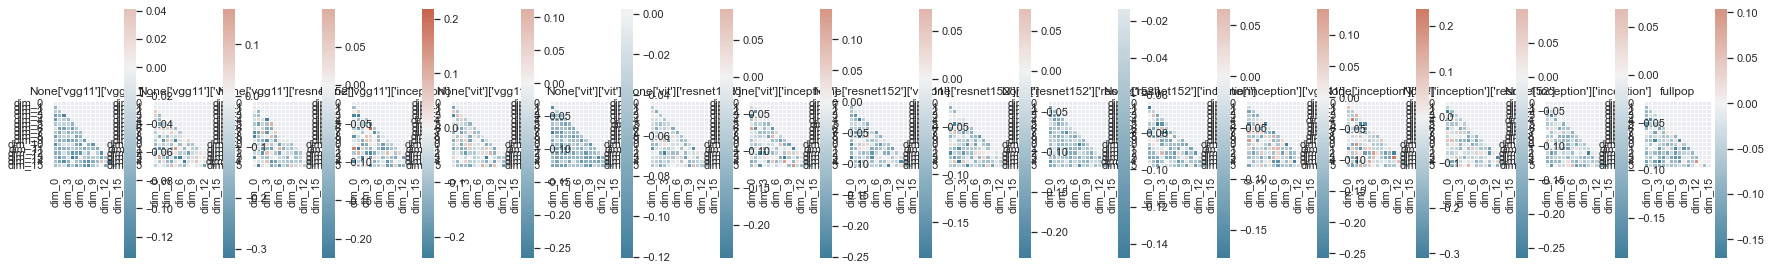

In [ ]:
# Ok. Correlation between dimensions now. Are any dimensions unnecessary ?
fig, axes = plt.subplots(1,len(df_inters)) 
for i,df_inter in enumerate(df_inters):
    # Compute the correlation matrix
    # (just on the dims, not on the rest of the information in interactions)
    corr = df_inter.loc[:,df_inter.columns.str.contains('dim')].corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=axes[i]).set_title(interaction_files[i])

# looks quite independant no ? with that in mind they'd all be necessary.

lets add :
* Independance of dims test
* entropy of pop languages vs one on one languages
* 